# [分類:Classfication]
# ワインデータ CSV ファイルをあつかっていく

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# CSV 読み込み
df = pd.read_csv('wine_class.csv')

In [39]:
print(df)

     Class  Alcohol   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0        1    14.23  2.43               15.6        127           2.80   
1        1    13.20  2.14               11.2        100           2.65   
2        1    13.16  2.67               18.6        101           2.80   
3        1    14.37  2.50               16.8        113           3.85   
4        1    13.24  2.87               21.0        118           2.80   
5        1    14.20  2.45               15.2        112           3.27   
6        1    14.39  2.45               14.6         96           2.50   
7        1    14.06  2.61               17.6        121           2.60   
8        1    14.83  2.17               14.0         97           2.80   
9        1    13.86  2.27               16.0         98           2.98   
10       1    14.10  2.30               18.0        105           2.95   
11       1    14.12  2.32               16.8         95           2.20   
12       1    13.75  2.41             

In [40]:
#df
df.head(3) # 頭から3行とりあえず表示した

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [41]:
# numpyの形式にすることに注意(valuesをつける！)
_t = df.iloc[:,0].values -1  # Class列を抽出
_x = df.iloc[:,1:].values # 自分はClass以降の列ぜ～んぶつかうぜ！

In [42]:
# いつものように変換をしてあげる
t = np.array(_t, dtype=np.int32)
x = np.array(_x, dtype=np.float32)

In [43]:
# dataset
dataset = list(zip(x, t))

In [44]:
from chainer.datasets import split_dataset_random

n_train = int( len(dataset) * 0.7 )
train, test = split_dataset_random(dataset, n_train, seed=1)

In [45]:
### にゅーらるねっとわ～く

In [46]:
import chainer
import chainer.links as L
import chainer.functions as F

In [47]:
# MLP: Multi-layer Perceptron
class MLP(chainer.Chain):
    
    def __init__(self, n_units1, n_units2, n_output):
        super().__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units1)
            self.l2 = L.Linear(None, n_units2)
            self.l3 = L.Linear(None, n_output)
            
    # chainerは分類でsoftmax関数明記しなくてよいってマジかよ。。
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)

In [48]:
np.random.seed(1) # 乱数のシードを固定

n_units1, n_units2, n_output = 10, 10, 3
mlp     = MLP(n_units1, n_units2, n_output) # 分類の時だけこんなの用意してくれてる。。
model = L.Classifier(mlp)  # 分類の時だけ手厚い。。

In [49]:
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

In [50]:
# iteratorsの設定
batchsize = 20 # データ少ないから20で良いか 本来は100ぐらいが良さそうかな
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

In [51]:
# updaterの設定
from chainer import training
updater = training.StandardUpdater(train_iter, optimizer)

In [52]:
# trainerとそのextensionsの設定
from chainer.training import extensions

# trainerの基本設定
epoch = 1000
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result')

# 評価データで評価
trainer.extend(extensions.Evaluator(test_iter, model))

# 学習結果の途中を表示する
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))

# １エポックごとに、trainデータに対するaccuracyと、testデータに対するaccuracyを出力させる
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy', 'elapsed_time']), trigger=(1, 'epoch'))

In [53]:
# 学習実行してくだされ～
trainer.run()

epoch       main/accuracy  validation/main/accuracy  elapsed_time
1           0.05           0.0809524                 0.0409992     
2           0.1            0.0809524                 0.0752184     
3           0.116667       0.0809524                 0.108641      
4           0.0916667      0.0976191                 0.142788      
5           0.0666667      0.0976191                 0.182695      
6           0.0571429      0.121429                  0.218414      
7           0.0583333      0.138095                  0.255231      
8           0.075          0.311905                  0.28676       
9           0.308333       0.328571                  0.318105      
10          0.241667       0.211905                  0.34918       
11          0.271429       0.264286                  0.383913      
12          0.341667       0.321429                  0.420599      
13          0.366667       0.354762                  0.451992      
14          0.458333       0.435714               

117         0.841667       0.747619                  3.97426       
118         0.858333       0.72381                   4.00995       
119         0.833333       0.747619                  4.04538       
120         0.858333       0.788095                  4.07868       
121         0.842857       0.72381                   4.11838       
122         0.841667       0.747619                  4.16529       
123         0.841667       0.747619                  4.21026       
124         0.858333       0.771429                  4.25179       
125         0.883333       0.747619                  4.29455       
126         0.821429       0.72381                   4.34186       
127         0.833333       0.747619                  4.38971       
128         0.841667       0.747619                  4.43332       
129         0.866667       0.747619                  4.47463       
130         0.841667       0.747619                  4.51641       
131         0.864286       0.747619             

239         0.891667       0.878571                  8.89301       
240         0.908333       0.878571                  8.94194       
241         0.914286       0.878571                  8.99529       
242         0.9            0.878571                  9.04593       
243         0.891667       0.845238                  9.09702       
244         0.891667       0.919048                  9.15123       
245         0.883333       0.878571                  9.19022       
246         0.914286       0.878571                  9.2407        
247         0.908333       0.895238                  9.2902        
248         0.916667       0.878571                  9.34293       
249         0.875          0.878571                  9.39351       
250         0.908333       0.935714                  9.44412       
251         0.885714       0.878571                  9.49893       
252         0.916667       0.919048                  9.55028       
253         0.891667       0.845238             

359         0.916667       0.935714                  13.6081       
360         0.916667       0.895238                  13.6369       
361         0.928571       0.919048                  13.6693       
362         0.925          0.919048                  13.6994       
363         0.916667       0.895238                  13.7293       
364         0.908333       0.919048                  13.7573       
365         0.908333       0.919048                  13.786        
366         0.928571       0.895238                  13.8165       
367         0.908333       0.935714                  13.8474       
368         0.925          0.935714                  13.8765       
369         0.916667       0.919048                  13.9055       
370         0.916667       0.919048                  13.934        
371         0.921429       0.935714                  13.965        
372         0.933333       0.895238                  13.9952       
373         0.916667       0.919048             

475         0.941667       0.919048                  19.1313       
476         0.928571       0.935714                  19.1881       
477         0.916667       0.919048                  19.2227       
478         0.95           0.919048                  19.263        
479         0.933333       0.935714                  19.2968       
480         0.933333       0.919048                  19.3299       
481         0.942857       0.935714                  19.3687       
482         0.933333       0.919048                  19.4022       
483         0.916667       0.935714                  19.4351       
484         0.941667       0.919048                  19.4684       
485         0.933333       0.935714                  19.5018       
486         0.928571       0.919048                  19.5373       
487         0.95           0.935714                  19.5706       
488         0.925          0.919048                  19.6053       
489         0.95           0.935714             

592         0.958333       0.919048                  25.9795       
593         0.933333       0.919048                  26.049        
594         0.958333       0.919048                  26.1155       
595         0.941667       0.919048                  26.1734       
596         0.957143       0.919048                  26.2291       
597         0.95           0.919048                  26.3315       
598         0.933333       0.919048                  26.4043       
599         0.933333       0.919048                  26.4773       
600         0.95           0.919048                  26.5529       
601         0.95           0.919048                  26.645        
602         0.933333       0.919048                  26.705        
603         0.933333       0.919048                  26.779        
604         0.95           0.919048                  26.8517       
605         0.95           0.919048                  26.9244       
606         0.957143       0.919048             

710         0.966667       0.919048                  33.9749       
711         0.957143       0.919048                  34.0613       
712         0.95           0.902381                  34.1463       
713         0.975          0.902381                  34.2022       
714         0.958333       0.902381                  34.2663       
715         0.958333       0.919048                  34.3218       
716         0.971429       0.942857                  34.3805       
717         0.975          0.919048                  34.4359       
718         0.958333       0.919048                  34.4905       
719         0.966667       0.902381                  34.5442       
720         0.975          0.919048                  34.5979       
721         0.964286       0.902381                  34.657        
722         0.966667       0.919048                  34.7004       
723         0.95           0.919048                  34.7411       
724         0.958333       0.919048             

826         0.971429       0.92619                   41.1336       
827         0.975          0.92619                   41.207        
828         0.975          0.885714                  41.2975       
829         0.975          0.942857                  41.3959       
830         0.975          0.92619                   41.4895       
831         0.964286       0.92619                   41.5844       
832         0.975          0.942857                  41.6687       
833         0.975          0.942857                  41.7353       
834         0.975          0.942857                  41.8015       
835         0.975          0.942857                  41.8698       
836         0.964286       0.942857                  41.9413       
837         0.966667       0.92619                   42.0085       
838         0.975          0.942857                  42.0769       
839         0.975          0.92619                   42.1647       
840         0.966667       0.92619              

945         0.983333       0.92619                   49.5887       
946         0.971429       0.92619                   49.6565       
947         0.991667       0.942857                  49.731        
948         0.983333       0.909524                  49.815        
949         0.983333       0.909524                  49.9106       
950         0.983333       0.942857                  50.0078       
951         0.978571       0.92619                   50.1251       
952         0.975          0.909524                  50.2059       
953         0.983333       0.942857                  50.2832       
954         0.975          0.92619                   50.3624       
955         0.983333       0.92619                   50.4431       
956         0.978571       0.909524                  50.5237       
957         0.991667       0.909524                  50.6003       
958         0.983333       0.942857                  50.7017       
959         0.975          0.909524             

### 学習結果確認しますかー

In [54]:
import json

with open('result/log') as f:
     logs = json.load(f)

In [55]:
result_train = [ log['main/loss'] for log in logs ]
result_test  = [ log['validation/main/loss'] for log in logs ]

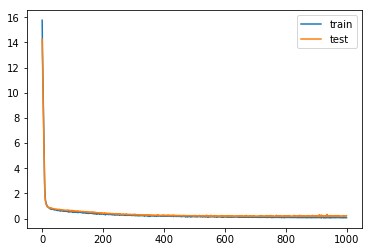

In [56]:
import matplotlib.pyplot as plt

plt.plot(result_train, label='train')  # 訓練データ
plt.plot(result_accuracy, label='accuracy')  # accuracy
plt.plot(result_test,  label='test')  # 検証データ
plt.legend()  # 凡例表示
plt.show()

### Accuracy も見ておこう、上司とかに報告する際はこっちになりますしお寿司

In [59]:
result_accuracy = [ log['main/accuracy'] for log in logs ]
result_accuracy_test  = [ log['validation/main/accuracy'] for log in logs ]

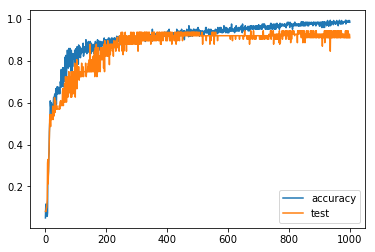

In [60]:
import matplotlib.pyplot as plt

plt.plot(result_accuracy, label='accuracy')  # 訓練データ
plt.plot(result_accuracy_test,  label='test')  # 検証データ
plt.legend()  # 凡例表示
plt.show()